# 鋼鐵缺陷分類


In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/andy6804tw/2023-15th-ironman/main/code/dataset/stell-faults.csv'
df_data = pd.read_csv(url)

In [3]:
df_data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


## 資料說明
該資料集涵蓋了鋼材製造過程中可能出現的多種缺陷情況，其中包含了7種帶鋼缺陷類型，具體分別是裝飾、Z_划痕、K_划痕、污漬、灰塵、凸塊以及其他故障。另外這個資料集是一個表格型的資料集，特別適用於機器學習和數據分析。它包含了來自機台的製程參數數據，這些參數是在製造或生產過程中收集的，每一筆資料都有相對應的標籤，即缺陷種類。

- 0: Pastry
- 1: Z_Scratch
- 2: K_Scatch
- 3: Stains
- 4: Dirtiness
- 5: Bumps
- 6: Other_Faults

In [4]:
x_feature_names = df_data.columns[:-7].values # 取得特徵欄位名稱
X = df_data[x_feature_names].values # 取出訓練資料特徵
y_label_names = df_data.columns[-7:].values # 取得標籤欄位名稱
y_one_hot_array = df_data[y_label_names].values # 取出標籤
# 使用argmax函數找到每個one hot向量中的最大值索引，並將其視為對應的標籤
y_labels = y_one_hot_array.argmax(axis=1)

print(f'The shape of X: {X.shape}')
print(f'The shape of y_labels: {y_labels.shape}')

The shape of X: (1941, 27)
The shape of y_labels: (1941,)


## 切割訓練集與測試集

In [5]:
from sklearn.model_selection import train_test_split

# 切分資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y_labels,test_size=0.1, random_state=42, stratify=y_labels)

# 觀察切割後資料的維度與筆數
print(f'The shape of X_train: {X_train.shape}\t y_train: {y_train.shape}')
print(f'The shape of X_test: {X_test.shape}\t y_test: {y_test.shape}')

The shape of X_train: (1746, 27)	 y_train: (1746,)
The shape of X_test: (195, 27)	 y_test: (195,)


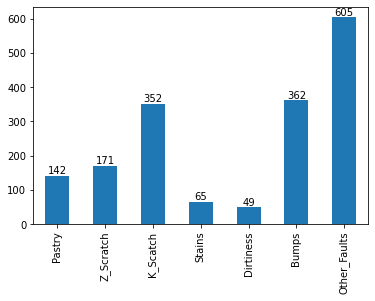

In [6]:
import matplotlib.pyplot as plt

# 查看七種類別筆數
label_counts = pd.Series(y_train).value_counts(sort=False)
fig = label_counts.plot(kind='bar')
fig.set_xticklabels(label_counts)
fig.set_xticklabels(y_label_names)
# 在每個bar上方顯示數值
for index, value in enumerate(label_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

## SMOTE處理標籤不平衡問題

In [7]:
!pip install -q imblearn

In [8]:
from imblearn.over_sampling import SMOTE

smo = SMOTE(sampling_strategy='auto',random_state=42)
X_train_smo, y_train_smo = smo.fit_resample(X_train, y_train)
print(f'The shape of X_train_smo: {X_train_smo.shape}')
print(f'The shape of y_train_smo: {y_train_smo.shape}')

The shape of X_train_smo: (4235, 27)
The shape of y_train_smo: (4235,)


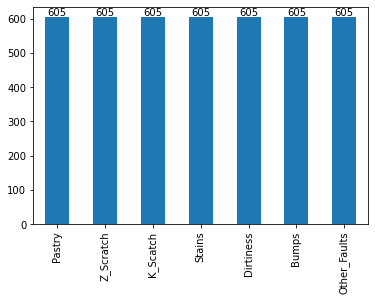

In [9]:
# 查看七種類別筆數
label_counts = pd.Series(y_train_smo).value_counts(sort=False)
fig = label_counts.plot(kind='bar')
fig.set_xticklabels(label_counts)
fig.set_xticklabels(y_label_names)
# 在每個bar上方顯示數值
for index, value in enumerate(label_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

## 建立LightGBM模型

In [10]:
import lightgbm as lgb

# 建立模型
model = lgb.LGBMClassifier()
# 訓練模型
model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5097
[LightGBM] [Info] Number of data points in the train set: 1746, number of used features: 27
[LightGBM] [Info] Start training from score -2.509256
[LightGBM] [Info] Start training from score -2.323419
[LightGBM] [Info] Start training from score -1.601452
[LightGBM] [Info] Start training from score -3.290695
[LightGBM] [Info] Start training from score -3.573262
[LightGBM] [Info] Start training from score -1.573439
[LightGBM] [Info] Start training from score -1.059854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

LGBMClassifier()

In [11]:
from sklearn.metrics import accuracy_score
pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.7948717948717948


In [13]:
from sklearn.metrics import classification_report


pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       1.00      0.95      0.97        19
           2       0.93      0.95      0.94        39
           3       1.00      0.86      0.92         7
           4       1.00      0.83      0.91         6
           5       0.70      0.65      0.68        40
           6       0.73      0.75      0.74        68

    accuracy                           0.79       195
   macro avg       0.86      0.82      0.83       195
weighted avg       0.80      0.79      0.80       195



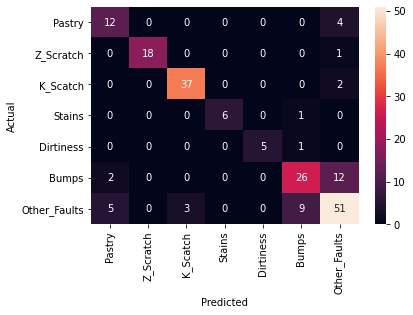

In [14]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(actual_val, pred_val, labels=y_label_names, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()
plot_confusion_matrix(y_test, pred, labels=y_label_names)

## Kernel SHAP 解釋模型

In [15]:
!pip install -q shap

  Using cached shap-0.42.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (545 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [15]:
import shap
shap.initjs()

# 使用 Kernel SHAP 解釋模型
explainer = shap.KernelExplainer(model=model.predict_proba, data=X_train[:100], link='logit')
# 估算 Shapley values
shap_values = explainer.shap_values(X=X_test[:10], nsamples=100)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/10 [00:00<?, ?it/s]

In [16]:
# explainer = shap.TreeExplainer(model=model, data=X_train)
# shap_values = explainer.shap_values(X=X_test[:10])

In [17]:
print(f'length of SHAP values: {len(shap_values)}')
print(f'Shape of each element: {shap_values[0].shape}')

length of SHAP values: 7
Shape of each element: (10, 27)


## 全局解釋模型
### SHAP Summary Plot
SHAP Summary Plot 可以幫助了解模型的特徵重要性，幫助解釋模型的預測。如果某個特徵的 SHAP 值較大且穩定，則可以認為該特徵對模型預測的影響較大且較一致。反之，如果特徵的 SHAP 值較小且不穩定，則可能認為該特徵對模型預測的影響較小或不一致。

- 點的顏色: Feature value 的大小，越紅越大、越藍越小
- X 軸: 該點對於 shap value 的影響，也就是對預測值的影響
- Y 軸: 每個特徵

我們可以使用 `plot_type` 參數設置 `bar` 畫一張條形圖，不同顏色代表不同類別(以下範例藍色代表預測Yes的重要程度，紅色為No)，每個條形代表一個特徵，並顯示該特徵對模型預測的影響程度。在這個圖表中，每個特徵對於各個類別的影響被堆疊起來，以創建整體的特徵重要性圖。

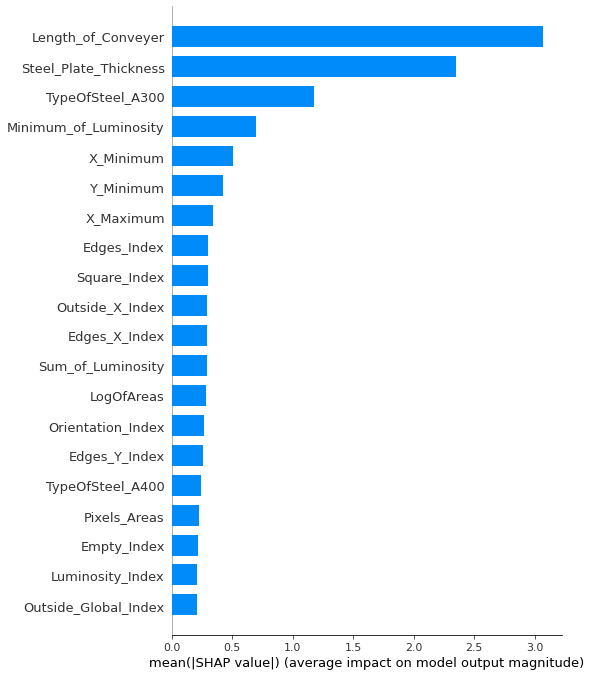

In [18]:
y_class = 1
shap.summary_plot(shap_values[y_class], X_test, plot_type="bar", feature_names = x_feature_names)

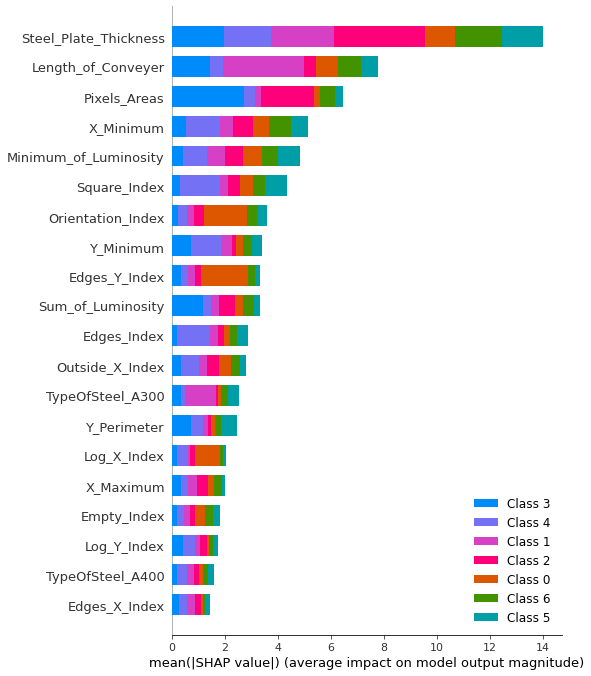

In [19]:
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = x_feature_names)

## 局部解釋模型
### SHAP Force plot
我們可以觀察單一筆資料在模型中的預測情況。在 SHAP 套件中，「Force Plot」方法提供了針對單一模型預測的解釋性呈現。在這個圖表中，我們可以清楚地看到各特徵對模型對特定輸入值的預測所做的貢獻。這種方法在進行錯誤分析或深入理解特定情況下的資料時非常有幫助。


In [20]:
import numpy as np
np.set_printoptions(precision=6, threshold=8, edgeitems=4, linewidth=75, suppress=True, nanstr='nan', infstr='inf')

In [21]:
shap.initjs()
# 觀察測試集中第一筆資料預測的重要程度
index=0
pred_class = int(model.predict(X_test[[index]])[0])
pred_proba = model.predict_proba(X_test[[index]])[0][pred_class]
print(f'測試集第 {index+1} 筆模型預測結果: {pred_class} 機率值: {pred_proba}')
print(f'真實答案: {int(y_test[index])}')
shap.force_plot(explainer.expected_value[pred_class], shap_values[pred_class][index], X_test[index], feature_names=x_feature_names, link='logit')

測試集第 1 筆模型預測結果: 1 機率值: 0.575149124666113
真實答案: 1


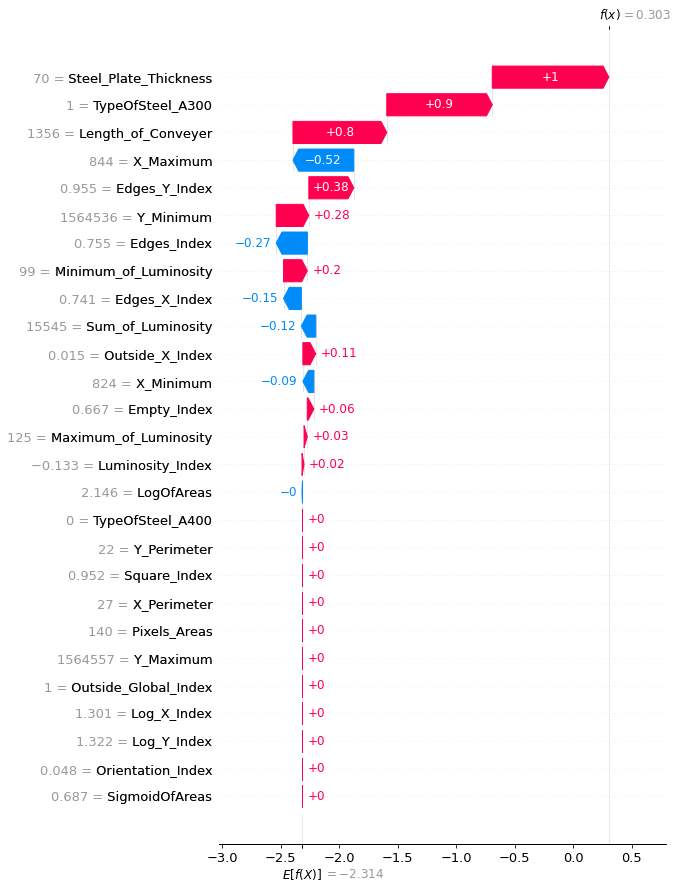

In [22]:
shap.waterfall_plot(shap.Explanation(values=shap_values[pred_class][index], 
                                    base_values=explainer.expected_value[pred_class], data=X_test[index],  
                                    feature_names=x_feature_names),
                                    max_display=27)

In [23]:
x = sum(shap_values[pred_class][index])+explainer.expected_value[pred_class]
1/(1+np.exp(-x))

0.575149124666113

## Permutation importance解釋全局模型
使用 sklearn permutation_importance

In [24]:
from sklearn.inspection import permutation_importance

# 使用 permutation_importance 函數計算特徵重要性
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# 印出各特徵的平均重要性排序
sorted_idx = result.importances_mean.argsort()[::-1]
for i in sorted_idx:
    print(f"{x_feature_names[i]:<10} importance: {result.importances_mean[i]:.3f} +/- {result.importances_std[i]:.3f}")

Steel_Plate_Thickness importance: 0.171 +/- 0.014
Length_of_Conveyer importance: 0.114 +/- 0.015
TypeOfSteel_A300 importance: 0.046 +/- 0.013
Y_Minimum  importance: 0.044 +/- 0.014
Minimum_of_Luminosity importance: 0.044 +/- 0.017
Edges_Y_Index importance: 0.031 +/- 0.010
X_Minimum  importance: 0.029 +/- 0.007
Edges_Index importance: 0.027 +/- 0.013
Maximum_of_Luminosity importance: 0.024 +/- 0.013
X_Maximum  importance: 0.023 +/- 0.013
X_Perimeter importance: 0.018 +/- 0.005
Empty_Index importance: 0.017 +/- 0.007
Square_Index importance: 0.014 +/- 0.010
Orientation_Index importance: 0.012 +/- 0.010
Sum_of_Luminosity importance: 0.011 +/- 0.012
Luminosity_Index importance: 0.010 +/- 0.009
Log_X_Index importance: 0.008 +/- 0.010
Outside_Global_Index importance: 0.002 +/- 0.003
Outside_X_Index importance: 0.002 +/- 0.009
LogOfAreas importance: 0.000 +/- 0.000
Y_Maximum  importance: 0.000 +/- 0.000
Pixels_Areas importance: -0.001 +/- 0.009
TypeOfSteel_A400 importance: -0.001 +/- 0.002
Ed